# 1. Analyse Exploratoire des Données (EDA)

## 1.1 Chargement et Préparation des Données

Importer les bibliothèques nécessaires :

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


ModuleNotFoundError: No module named 'sklearn'

Charger les données :

In [51]:
df = pd.read_csv("C:/Users/aymaa/Desktop/my_project/01_Data/supermarket_sales.csv")

Vérifier les informations générales :

In [52]:
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Vérification des valeurs manquantes
print(df.duplicated().sum())  # Vérification des doublons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [53]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Convertir les dates et créer des variables temporelles utiles :

In [54]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()


## 1.2 Analyse et Visualisation des Données

Distribution des ventes par ligne de produit :

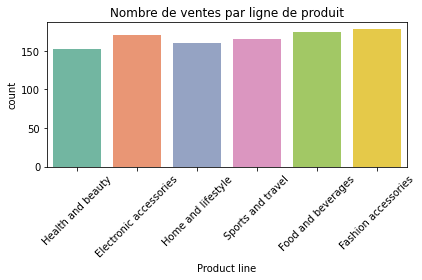

In [57]:
sns.countplot(data=df, x='Product line', palette='Set2')
plt.title("Nombre de ventes par ligne de produit")

# Rotation des labels de l'axe X pour éviter le chevauchement
plt.xticks(rotation=45)  # Ajuste l'angle de rotation si nécessaire
plt.tight_layout()  # Ajuste la disposition pour que les labels ne soient pas coupés

plt.show()

Distribution des ventes par succursale :

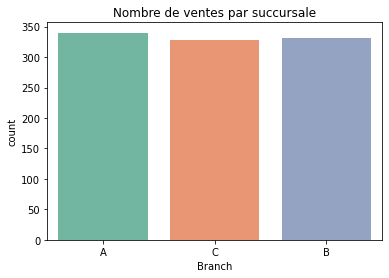

In [58]:
sns.countplot(data=df, x='Branch', palette='Set2')
plt.title("Nombre de ventes par succursale")
plt.show()

Analyse des tendances de ventes dans le temps :

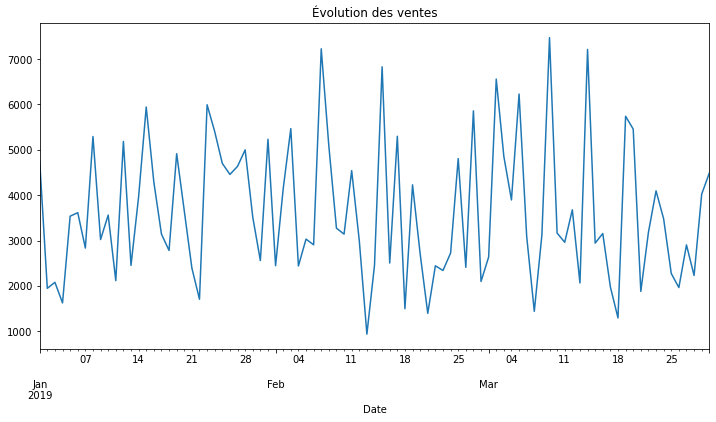

In [59]:
df.groupby('Date')['Total'].sum().plot(figsize=(12, 6), title="Évolution des ventes")
plt.show()

Traitement des Variables Catégorielles :

In [60]:
# Initialisation de l'encodeur
le = LabelEncoder()

# Encodage des variables catégorielles
df['Branch_encoded'] = le.fit_transform(df['Branch'])
df['City_encoded'] = le.fit_transform(df['City'])
df['Customer_type_encoded'] = le.fit_transform(df['Customer type'])
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['DayOfWeek_num'] = df['DayOfWeek'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 
                                           'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})

# One-Hot Encoding pour 'Product line' et 'Payment'
df = pd.get_dummies(df, columns=['Product line'], drop_first=True)
df = pd.get_dummies(df, columns=['Payment'], drop_first=True)


In [61]:
# Vérification des nouvelles colonnes ajoutées
df.head()
# df.columns

,Invoice ID,Branch,City,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,...,Customer_type_encoded,Gender_encoded,DayOfWeek_num,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,750-67-8428,A,Yangon,Member,Female,74.69,7,26.1415,548.9715,2019-01-05,...,0,0,5,0,0,1,0,0,0,1
1,226-31-3081,C,Naypyitaw,Normal,Female,15.28,5,3.8200,80.2200,2019-03-08,...,1,0,4,0,0,0,0,0,0,0
2,631-41-3108,A,Yangon,Normal,Male,46.33,7,16.2155,340.5255,2019-03-03,...,1,1,6,0,0,0,1,0,1,0
3,123-19-1176,A,Yangon,Member,Male,58.22,8,23.2880,489.0480,2019-01-27,...,0,1,6,0,0,1,0,0,0,1
4,373-73-7910,A,Yangon,Normal,Male,86.31,7,30.2085,634.3785,2019-02-08,...,1,1,4,0,0,0,0,1,0,1


Corrélations entre les variables :

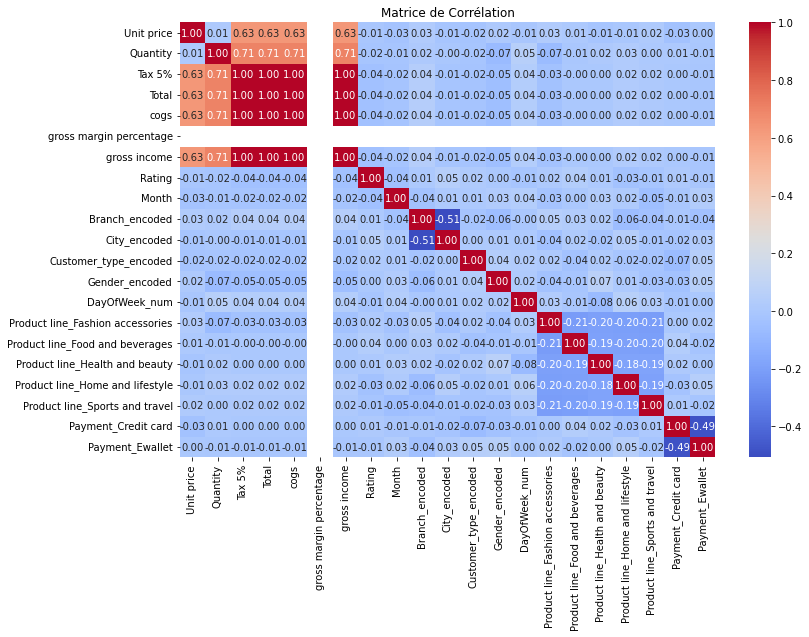

In [62]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


# 2. Développement du Tableau de Bord Interactif

In [3]:
import streamlit as st
import pandas as pd
import plotly.express as px


In [22]:
# Charger les données
df = pd.read_csv("C:/Users/aymaa/Desktop/my_project/01_Data/supermarket_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])


In [23]:
# Titre du tableau de bord
st.title("Tableau de bord des ventes du supermarché")

# Sélection de la succursale
branch = st.selectbox("Sélectionnez une succursale :", df["Branch"].unique())

# Filtrer les données
filtered_df = df[df["Branch"] == branch]

# Affichage des indicateurs clés
total_sales = filtered_df["Total"].sum()
avg_sales = filtered_df["Total"].mean()

st.metric("Ventes totales", f"${total_sales:,.2f}")
st.metric("Vente moyenne par transaction", f"${avg_sales:,.2f}")

# Graphique des ventes par date
fig = px.line(filtered_df, x="Date", y="Total", title="Évolution des ventes")
st.plotly_chart(fig)

# Graphique des ventes par catégorie de produit
fig = px.bar(filtered_df, x="Product line", y="Total", title="Ventes par catégorie de produit", color="Product line")
st.plotly_chart(fig)


2025-03-10 07:02:08.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 07:02:08.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 07:02:08.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 07:02:08.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 07:02:08.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 07:02:08.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 07:02:08.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 07:02:08.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [26]:
!streamlit run dashboard.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: dashboard.py
